In [6]:
import numpy as np
from numpy import count_nonzero
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot as scatter
from scipy.sparse import csr_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.model_selection import cross_val_score
#import sklearn.metrics.scorer as scorer


#reading data from file

#df,meta=pyreadstat.read_sav("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvando.sav")
df=pd.read_excel("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvandolabelmodified.xls")

#preprocessing operations such as converting Nan values to zero,
#converting fields without value to zero,
#removing ID,fisrtname, and familyname columns from dataset

features_name=df.columns
data=np.array(df)
df=pd.DataFrame(data=data,columns=features_name)
df=df.drop(['firstname','familyname','year'],axis=1)

# keep only women samples
df1=df
for l in range(2559):
    if (df1.iloc[l,0]==1.0):
        df=df.drop([l])    

true_labels=df.iloc[:,-1]
df=df.drop(['label','gender'],axis=1)
features_name=df.columns




for l in range(len(df.columns)):
    nanvalue_ratio=(df.iloc[:,l].isna().sum()/float( len(df)))*100
    zerovalue_ratio=100-((count_nonzero(df.iloc[:,l]) / float(len(df)))*100)
    realnanvalue_ratio=nanvalue_ratio+zerovalue_ratio
    print('percentage of nan values of feature %s is %0.3f' %(features_name[l], realnanvalue_ratio))
    print('maximum value of feature %s is %s' %(features_name[l],df.iloc[:,l].max()))
    print('minimum value of feature %s is %s' %(features_name[l],df.iloc[:,l].min()))
    print("............................................................................")



percentage of nan values of feature age is 13.782
maximum value of feature age is 44.0
minimum value of feature age is 0.0
............................................................................
percentage of nan values of feature weight is 8.205
maximum value of feature weight is 111.0
minimum value of feature weight is 30.0
............................................................................
percentage of nan values of feature height is 15.641
maximum value of feature height is 200.0
minimum value of feature height is 0.0
............................................................................
percentage of nan values of feature satHeight is 24.295
maximum value of feature satHeight is 109.0
minimum value of feature satHeight is 0.0
............................................................................
percentage of nan values of feature ArmSpan is 56.346
maximum value of feature ArmSpan is 218.0
minimum value of feature ArmSpan is 0.0
.........................

In [7]:
df=df.drop(['Concani','burus','wingetAP','WingtePP','ricaveri','oneMayl','pareshTool','ghodratPanjeh','barfix','jaheshJanebi',
            'FlexibleShoulder','RTshenidari','tawanBiHavazi','biHAVA1609','Do1600','yekMayl',
            'metr540','taadol'],axis=1)
features_name=df.columns

In [9]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

data=np.array(df)
data=data.astype('float')
data[data==0.0]=np.nan
df=pd.DataFrame(data=data,columns=features_name)

strategy=('mean','median')
simpleimputer=SimpleImputer(missing_values=np.nan, strategy=strategy[0])
data1=simpleimputer.fit_transform(df)
#df1=pd.DataFrame(data=data1,columns=features_name)
#simpleimputer=SimpleImputer(missing_values=0.0, strategy=strategy[0])
#data1=simpleimputer.fit_transform(df1)


knnimputer=KNNImputer(missing_values=np.nan)
data2=knnimputer.fit_transform(df)
#df2=pd.DataFrame(data=data2,columns=features_name)
#knnimputer=KNNImputer(missing_values=0.0)
#data2=knnimputer.fit_transform(df2)

estimators=[BayesianRidge(),
            DecisionTreeRegressor(max_features='sqrt',random_state=0),
            ExtraTreesRegressor(n_estimators=10, random_state=0),
            KNeighborsRegressor(n_neighbors=15)
           ]

iterativeimputer=IterativeImputer(missing_values=np.nan, random_state=0, estimator=estimators[0], n_nearest_features=5)
data3=iterativeimputer.fit_transform(df)
#df3=pd.DataFrame(data=data3,columns=features_name)
#iterativeimputer=IterativeImputer(missing_values=0.0, random_state=0, estimator=estimators[0], n_nearest_features=5)
#data3=iterativeimputer.fit_transform(df3)



C:\Users\APPLE\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


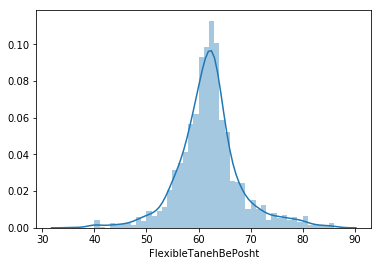

In [10]:
df=pd.DataFrame(data=data3,columns=features_name)
sns.distplot(df.iloc[:,16],axlabel=features_name[16])

In [93]:
for l in range(len(df.columns)):
    print('maximum value of feature %s is %s' %(features_name[l],df.iloc[:,l].max()))
    print('minimum value of feature %s is %s' %(features_name[l],df.iloc[:,l].min()))
    print("............................................................................")


maximum value of feature age is 44.0
minimum value of feature age is 12.0
............................................................................
maximum value of feature weight is 111.0
minimum value of feature weight is 30.0
............................................................................
maximum value of feature height is 200.0
minimum value of feature height is 111.0
............................................................................
maximum value of feature satHeight is 109.0
minimum value of feature satHeight is 47.0
............................................................................
maximum value of feature ArmSpan is 218.0
minimum value of feature ArmSpan is 82.0
............................................................................
maximum value of feature fat is 52.0
minimum value of feature fat is 3.0
............................................................................
maximum value of feature Vo2Max is 68.8
minimum value of f

In [5]:
#performing standardScaler as preprocessing

scaler=StandardScaler(with_mean=False)
data_scaled=scaler.fit_transform(data2)
df=pd.DataFrame(data=data_scaled,columns=features_name)

df.to_excel("C:/Users/APPLE/Desktop/Folders/sana thesis/men-tekvando.xls")


In [ ]:
#keep 20% of dataset for test
df_train,df_test=train_test_split(df,test_size=0.2)
data=np.array(df_train)

In [94]:
for l in range(len(df.columns)):
    print('maximum value of feature %s is %s' %(features_name[l],df.iloc[:,l].max()))
    print('minimum value of feature %s is %s' %(features_name[l],df.iloc[:,l].min()))
    print("............................................................................")


maximum value of feature age is 44.0
minimum value of feature age is 12.0
............................................................................
maximum value of feature weight is 111.0
minimum value of feature weight is 30.0
............................................................................
maximum value of feature height is 200.0
minimum value of feature height is 111.0
............................................................................
maximum value of feature satHeight is 109.0
minimum value of feature satHeight is 47.0
............................................................................
maximum value of feature ArmSpan is 218.0
minimum value of feature ArmSpan is 82.0
............................................................................
maximum value of feature fat is 52.0
minimum value of feature fat is 3.0
............................................................................
maximum value of feature Vo2Max is 68.8
minimum value of f

In [11]:
for l in range(len(df.columns)):
    print('maximum value of feature %s is %s' %(features_name[l],df.iloc[:,l].mean()))
    print('minimum value of feature %s is %s' %(features_name[l],df.iloc[:,l].std()))
    print("............................................................................")


maximum value of feature age is 20.748301917226126
minimum value of feature age is 4.80574341683247
............................................................................
maximum value of feature weight is 68.66404500721998
minimum value of feature weight is 12.084029010794863
............................................................................
maximum value of feature height is 178.78267786661175
minimum value of feature height is 8.293447774066044
............................................................................
maximum value of feature satHeight is 93.81476750127837
minimum value of feature satHeight is 5.341270094104205
............................................................................
maximum value of feature ArmSpan is 182.92357208746446
minimum value of feature ArmSpan is 9.30625841426581
............................................................................
maximum value of feature fat is 11.121579729468596
minimum value of feature fat i